- load logs
- normalisation
- feture engineering 
- UMAP

In [1]:
from welly import Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("./LASDF_CALI_FLAG_RES.csv").drop(['UWI'], axis=1)
# data_df = pd.read_csv("./big_df.csv")

In [3]:
data_df['W'] = data_df['W'].apply(lambda n: n[:-4])
data_df['LITHOLOGY_GEOLINK'] = data_df.apply(lambda row: row['LITHOLOGY_GEOLINK'] if not np.isnan(row['LITHOLOGY_GEOLINK']) else -1, axis=1)

In [4]:
data_df.head()

Unnamed: 0  LITHOLOGY_GEOLINK        W       CALI   DRHO      NPHI   RHOB  \
0       11302                6.0  15_9-12  14.438001  0.010  0.447725  2.363   
1       11303                6.0  15_9-12  14.633000  0.006  0.432095  2.340   
2       11304                6.0  15_9-12  14.813001  0.006  0.410166  2.314   
3       11305                6.0  15_9-12  14.383001 -0.001  0.414143  2.293   
4       11306                6.0  15_9-12  14.202999  0.001  0.439923  2.275   

          GR         DTC      RDEP         SP      RSHA      RMED  \
0  60.285748  134.253601  0.737006  50.570400  0.785088  0.785088   
1  63.250000  129.101868  0.741000  50.820000  0.840000  0.840000   
2  61.405998  122.476944  0.752000  50.820000  0.858000  0.858000   
3  62.561596  116.908607  0.739962  51.070000  0.857046  0.857046   
4  61.691055  115.390953  0.715966  51.070602  0.886082  0.886082   

            MD       WN     BS  Bflag  Bflag_s  BF  
0  2215.917725  15_9-12  12.25      0        0   0  
1  2216.070068  15_9-12  12.25      0        0   0  
2  2216.222412  15_9-12  12.25      0        0   0  
3  2216.375000  15_9-12  12.25      0        0   0  
4  2216.527344  15_9-12  12.25      0        0   0

In [5]:
valid_df = data_df.loc[~data_df.isna().any(axis=1)]

#### Features

In [6]:
well_names = valid_df['W'].unique()
print(well_names)

['15_9-12' '15_9-13' '15_9-14' '15_9-15' '15_9-17' '15_9-18' '15_9-2'
 '15_9-4' '15_9-7' '15_9-8' '15_9-9' '16_1-2' '16_4-1' '16_7-2' '16_7-3'
 '16_7-4' '16_7-5' '16_7-6' '16_8-1' '17_11-1' '17_4-1' '25_10-4 R'
 '25_11-15' '25_11-23' '25_2-14' '25_2-5' '25_2-7' '25_3-1' '25_4-1'
 '25_5-1' '25_5-3' '25_5-4' '25_6-1' '25_6-2' '25_7-2' '25_8-5 S' '25_8-7'
 '26_4-1' '29_6-1' '30_11-3' '30_2-1' '30_3-2 R' '30_3-3' '30_4-1'
 '30_4-2' '30_6-11' '30_6-14' '30_6-22' '30_6-23' '30_6-5' '30_6-8'
 '30_7-7' '31_2-1' '31_2-10' '31_2-19 S' '31_2-2 R' '31_2-3' '31_2-7'
 '31_2-8' '31_2-9' '31_3-1' '31_3-2' '31_3-3' '31_4-10' '31_4-2' '31_4-3'
 '31_4-4' '31_4-5' '31_4-6' '31_5-4 S' '31_6-1' '31_6-5' '31_6-8' '33_5-2'
 '33_6-1' '33_9-1' '33_9-17' '33_9-6' '34_10-12' '34_10-17' '34_10-19'
 '34_10-21' '34_10-23' '34_10-33' '34_10-35' '34_10-5' '34_10-7'
 '34_11-2 S' '34_2-2 R' '34_2-4' '34_4-2' '34_4-3' '34_7-12' '34_7-13'
 '34_7-20' '34_7-5' '34_8-1' '34_8-3' '34_8-7' '35_11-1' '35_11-10'
 '35_11-2' '35_1

In [7]:
st_wells = ['25_2-13 T4', '25_8-5 S', '31_2-2 R', '31_5-2 R', '31_5-4 S', '34_10-16 R', '34_2-2 R', '34_11-2 S']
v_well_names = [n for n in well_names if n not in st_wells]
print(len(v_well_names), "prob vertical")

106 prob vertical


In [8]:
import random
# well_names_to_use = random.sample(v_well_names, 6)
well_names_to_use = ['31_2-1','31_2-10','31_2-3','31_2-7','31_2-8','31_2-9']
valid_df = valid_df[valid_df['W'].isin(well_names_to_use)]

In [9]:
print(well_names_to_use)

['31_2-1', '31_2-10', '31_2-3', '31_2-7', '31_2-8', '31_2-9']


In [19]:
meta_df = valid_df[['W','LITHOLOGY_GEOLINK','WN','MD', 'BS', 'Bflag', 'Bflag_s', 'BF']].copy()
feature_df= valid_df.drop(['W','Unnamed: 0','LITHOLOGY_GEOLINK','WN','MD', 'BS', 'Bflag', 'Bflag_s', 'BF'], axis=1)

In [20]:
feature_df = feature_df.dropna()

In [21]:
# feature_df.to_pickle('./noqc_features_sp.pickle')

In [138]:
# take a smaller random sample
# feature_df = feature_df.head(40000)
# feature_df = feature_df.iloc[::9]
print(feature_df.columns.values)

['CALI' 'DRHO' 'NPHI' 'RHOB' 'GR' 'DTC' 'RDEP' 'SP' 'RSHA' 'RMED']


In [24]:
X = feature_df.values.tolist()
print(len(X), len(X[0]))

31273 10


#### Scaling

UMAP Expects normally distributed data

In [25]:
from sklearn.preprocessing import RobustScaler

In [26]:
scaler = RobustScaler()
scaler.fit(X)

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [27]:
Xs = scaler.transform(X)

#### Run UMAP

In [28]:
n_neighbors= 8# default 15
min_dist=0.99 # defult 0.1
n_components=2
metric='minkowski' #'euclidean' #'minkowski'

In [29]:
import umap
reducer = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric)

In [30]:
import time

start = time.process_time()
embedding = reducer.fit_transform(Xs)
end = time.process_time()
embedding.shape

print("Time {} secs".format(end-start))

//anaconda3/lib/python3.7/site-packages/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
//anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/lib/python3.7/site-packages/umap/utils.py", line 409:
@num

Time 96.07477 secs


In [31]:
import matplotlib.pyplot as plt

In [32]:
NUM_LITH = 37

In [47]:
LITH_KEY_MAP = [1,1,1,1,7,7,8,8,3,1,3,3,3,8,3,3,4,4,6,6,2,2,5,5,8,2,2,6,4,1,4,2,2,2,1,4]

In [205]:
LITH_NAME_MAP = ["Sand","Evaporite","Calc","Lithic","Intrusive","Extrusive","Silt","Shale"]

In [50]:
valid_df["LITH"] = valid_df['LITHOLOGY_GEOLINK'].apply(lambda n: LITH_KEY_MAP[int(n)] )

### Load Awesome Rocks

In [191]:
a_sands_df = pd.read_csv('./AWESOME_SAND.csv')
a_oil_sands_df = pd.read_csv('./AWESOME_OILSAND.csv')

In [192]:
a_sand_feature_df = a_sands_df.loc[a_sands_df['SAND']==1,['CALI', 'DRHO', 'NPHI', 'RHOB', 'GR', 'DTC', 'RDEP', 'SP', 'RSHA', 'RMED']]
a_oil_sand_feature_df = a_oil_sands_df.loc[a_oil_sands_df['OIL_SAND']==1,['CALI', 'DRHO', 'NPHI', 'RHOB', 'GR', 'DTC', 'RDEP', 'SP', 'RSHA', 'RMED']]

X_a_sand = a_sand_feature_df.dropna().values.tolist()
print(len(X_a_sand), len(X_a_sand[0]))
X_a_oil_sand = a_oil_sand_feature_df.dropna().values.tolist()
print(len(X_a_oil_sand), len(X_a_oil_sand[0]))

a_sand_y = reducer.transform(scaler.transform(X_a_sand))
a_oil_sand_y = reducer.transform(scaler.transform(X_a_oil_sand))

8788 10
301 10


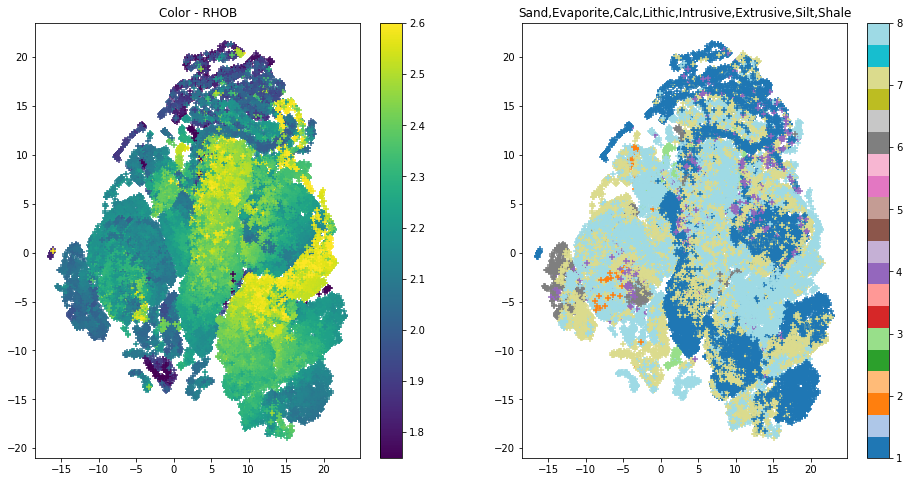

In [213]:
import matplotlib as mpl
cmap = mpl.cm.get_cmap('viridis', NUM_LITH)
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.scatter(embedding[:,0], embedding[:,1], c=valid_df['RHOB'], cmap='viridis', marker="+", vmin=1.75, vmax=2.6)
plt.colorbar()
plt.title("Color - RHOB")
# plt.scatter(a_sand_y[:,0], a_sand_y[:,1], c=a_sands_df.dropna().loc[a_sands_df['SAND']==1]['MD'])
# plt.scatter(a_oil_sand_y[:,0], a_oil_sand_y[:,1], color="orange",  marker="s")


# plt.figure(figsize=(12,12))
plt.subplot(122)
plt.scatter(embedding[:,0], embedding[:,1], c=valid_df['LITH'], cmap='tab20', marker="+")
plt.title(",".join(LITH_NAME_MAP))
plt.colorbar()

### Forward Pass - Troll Depth

In [225]:
forward_troll_df = valid_df.copy()

depth_i = (forward_troll_df["MD"] >= 1000) & (forward_troll_df["MD"] <= 1500)
forward_troll_df = forward_troll_df.loc[depth_i]

In [226]:
meta_df = forward_troll_df[['W','LITHOLOGY_GEOLINK','WN','MD', 'BS', 'Bflag', 'Bflag_s', 'BF']].copy()
forward_troll_feature_df= forward_troll_df.drop(['W','Unnamed: 0','LITHOLOGY_GEOLINK','LITH','WN','MD', 'BS', 'Bflag', 'Bflag_s', 'BF'], axis=1)

In [227]:
forward_troll_feature_df = forward_troll_feature_df.dropna()
X = forward_troll_feature_df.values.tolist()
print(len(X), len(X[0]))

6556 10


In [228]:
Xs = scaler.transform(X)
y = reducer.transform(Xs)

In [229]:
a_sand_troll_feature_df = a_sands_df.loc[(a_sands_df['SAND']==1)&(a_sands_df["MD"] >= 1000) & (a_sands_df["MD"] <= 1500),['CALI', 'DRHO', 'NPHI', 'RHOB', 'GR', 'DTC', 'RDEP', 'SP', 'RSHA', 'RMED']]
a_oil_sand_troll_feature_df = a_oil_sands_df.loc[(a_oil_sands_df['OIL_SAND']==1)&((a_oil_sands_df["MD"] >= 1000) & (a_oil_sands_df["MD"] <= 1500)),['CALI', 'DRHO', 'NPHI', 'RHOB', 'GR', 'DTC', 'RDEP', 'SP', 'RSHA', 'RMED']]

X_a_sand_troll = a_sand_troll_feature_df.dropna().values.tolist()
print(len(X_a_sand_troll), len(X_a_sand_troll[0]))
X_a_oil_sand_troll = a_oil_sand_troll_feature_df.dropna().values.tolist()
print(len(X_a_oil_sand_troll), len(X_a_oil_sand_troll[0]))

a_sand_y_troll = reducer.transform(scaler.transform(X_a_sand_troll))
a_oil_sand_y_troll = reducer.transform(scaler.transform(X_a_oil_sand_troll))

1784 10
196 10


In [230]:
well_name_to_id_map = {name:n for n, name in enumerate(well_names_to_use)}
print(well_name_to_id_map)

{'31_2-1': 0, '31_2-10': 1, '31_2-3': 2, '31_2-7': 3, '31_2-8': 4, '31_2-9': 5}


In [231]:
forward_troll_df['Wid'] = forward_troll_df["W"].apply(lambda x: well_name_to_id_map[x])

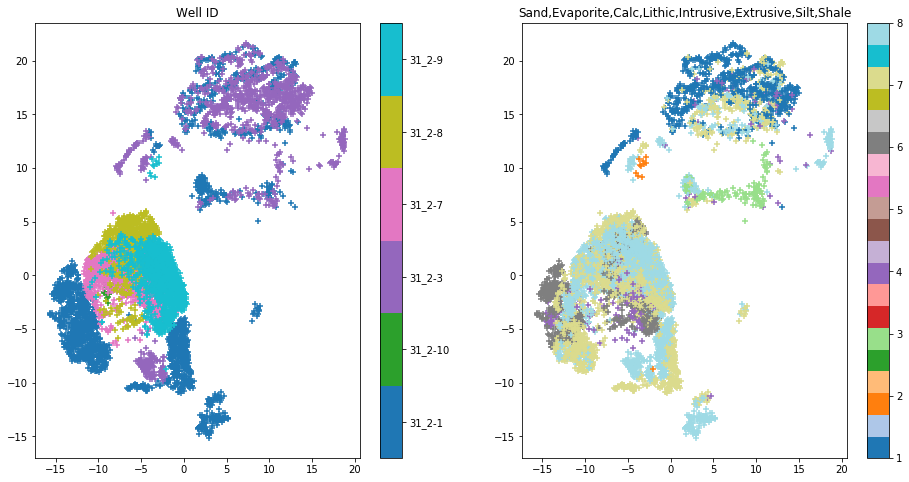

In [267]:
plt.figure(figsize=(16,8))
plt.subplot(121)
cmap = mpl.cm.get_cmap('tab10', 6)
plt.scatter(y[:,0], y[:,1], c=forward_troll_df['Wid'], cmap=cmap, marker="+", vmin=-0.5, vmax=5.5)
# plt.scatter(a_sand_y_troll[:,0], a_sand_y_troll[:,1], color='red')
# plt.scatter(a_oil_sand_y_troll[:,0], a_oil_sand_y_troll[:,1], color='orange', marker="s")
plt.title("Well ID")
cma = plt.colorbar()
cma.ax.set_yticklabels(well_names_to_use)

# plt.figure(figsize=(12,12))
plt.subplot(122)
plt.scatter(y[:,0], y[:,1], c=forward_troll_df['LITH'], cmap='tab20', marker="+")
plt.title(",".join(LITH_NAME_MAP))
plt.colorbar()

### Forward Pass -  Depth Trends

In [215]:
depth_trend_df = valid_df.copy()

In [216]:
meta_df = depth_trend_df[['W','LITHOLOGY_GEOLINK','WN','MD', 'BS', 'Bflag', 'Bflag_s', 'BF']].copy()
depth_trend_feature_df= depth_trend_df.drop(['W','Unnamed: 0','LITHOLOGY_GEOLINK','LITH','WN','MD', 'BS', 'Bflag', 'Bflag_s', 'BF'], axis=1)

In [217]:
depth_trend_feature_df = depth_trend_feature_df.dropna()
X = depth_trend_feature_df.values.tolist()
print(len(X), len(X[0]))

31273 10


In [218]:
Xs = scaler.transform(X)
y = reducer.transform(Xs)

In [221]:
import plotly.express as px
import plotly.graph_objs as go

y_df = pd.DataFrame(y, columns=['y0','y1'], index=depth_trend_df.index)

y_df['MD'] = -depth_trend_df['MD']
y_df['GR'] = depth_trend_df['GR']
y_df['MK'] = 1

fig = px.scatter_3d(y_df, x='y0', y='y1', z='MD', color='GR')

fig.show()

### Forward Pass - Heterolithics

In [291]:
forward_H_df = valid_df.copy()

# depth_i = (forward_H_df["MD"] >= 1000) & (forward_H_df["MD"] <= 1500)
# forward_H_df = forward_H_df.loc[depth_i]

In [292]:
forward_H_df = forward_H_df[forward_H_df['LITH']==1]

In [293]:
meta_df = forward_H_df[['W','LITHOLOGY_GEOLINK','WN','MD', 'BS', 'Bflag', 'Bflag_s', 'BF']].copy()
forward_H_feature_df= forward_H_df.drop(['W','Unnamed: 0','LITHOLOGY_GEOLINK','LITH','WN','MD', 'BS', 'Bflag', 'Bflag_s', 'BF'], axis=1)

In [294]:
forward_H_feature_df = forward_H_feature_df.dropna()
X = forward_H_feature_df.values.tolist()
print(len(X), len(X[0]))

7496 10


In [295]:
y_int_sand = reducer.transform(scaler.transform(X))

In [296]:
# a_sand_troll_feature_df = a_sands_df.loc[(a_sands_df['SAND']==1)&(a_sands_df["MD"] >= 1000) & (a_sands_df["MD"] <= 1500),['CALI', 'DRHO', 'NPHI', 'RHOB', 'GR', 'DTC', 'RDEP', 'SP', 'RSHA', 'RMED']]
# a_oil_sand_troll_feature_df = a_oil_sands_df.loc[(a_oil_sands_df['OIL_SAND']==1)&((a_oil_sands_df["MD"] >= 1000) & (a_oil_sands_df["MD"] <= 1500)),['CALI', 'DRHO', 'NPHI', 'RHOB', 'GR', 'DTC', 'RDEP', 'SP', 'RSHA', 'RMED']]

# X_a_sand_troll = a_sand_troll_feature_df.dropna().values.tolist()
# print(len(X_a_sand_troll), len(X_a_sand_troll[0]))
# X_a_oil_sand_troll = a_oil_sand_troll_feature_df.dropna().values.tolist()
# print(len(X_a_oil_sand_troll), len(X_a_oil_sand_troll[0]))

# a_sand_y_troll = reducer.transform(scaler.transform(X_a_sand_troll))
# a_oil_sand_y_troll = reducer.transform(scaler.transform(X_a_oil_sand_troll))

In [297]:
# well_name_to_id_map = {name:n for n, name in enumerate(well_names_to_use)}
# print(well_name_to_id_map)

In [298]:
# forward_troll_df['Wid'] = forward_troll_df["W"].apply(lambda x: well_name_to_id_map[x])

In [301]:
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.scatter(y_int_sand[:,0], y_int_sand[:,1], c=forward_H_df['GR'], cmap='viridis', marker="+")
# plt.scatter(a_sand_y_troll[:,0], a_sand_y_troll[:,1], color='red')
# plt.scatter(a_oil_sand_y_troll[:,0], a_oil_sand_y_troll[:,1], color='orange', marker="s")
plt.title("GR")
cma = plt.colorbar()

# plt.figure(figsize=(12,12))
plt.subplot(122)
cmap = mpl.cm.get_cmap('tab10', 3)
plt.scatter(y_int_sand[:,0], y_int_sand[:,1], c=forward_H_df['LITHOLOGY_GEOLINK'], cmap=cmap, marker="+", vmin=0.5, vmax=3.5)
plt.title(",".join(LITH_NAME_MAP))
cma = plt.colorbar()
plt.grid()
# cma.set_ticks(list(range(1,4)))
cma.ax.set_yticklabels(["", "Sand","","Silty Sand", '',"Crossbedded Sand"])

[Text(1, 0, ''),
 Text(1, 0, 'Sand'),
 Text(1, 0, ''),
 Text(1, 0, 'Silty Sand'),
 Text(1, 0, ''),
 Text(1, 0, 'Crossbedded Sand')]

In [300]:
y_int_sand_df = pd.DataFrame(y_int_sand, columns=['y0','y1'], index=forward_H_df.index)

In [308]:
flag_i = (y_int_sand_df['y0']<-3)&(y_int_sand_df['y1']>5)

In [310]:
forward_H_df['SPUR_FLAG'] = 0

In [321]:
ar = forward_H_df['SPUR_FLAG'].values
mask = flag_i.values
ar[mask] = 1
forward_H_df['SPUR_FLAG'] = ar

Text(0, 0.5, 'CALI')

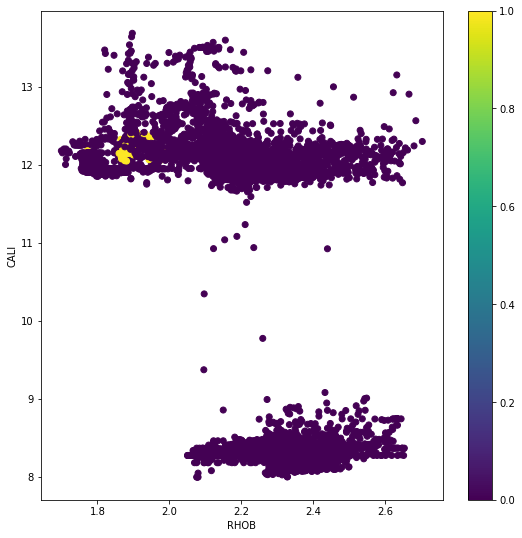

In [325]:
plt.figure(figsize=(9,9))
plt.scatter(forward_H_df['RHOB'], forward_H_df['CALI'], c=forward_H_df['SPUR_FLAG'])
plt.colorbar()
plt.xlabel("RHOB")
plt.ylabel("CALI")